# Generate correction profiles for lumencor celesta

by Pu Zheng

2021.06.18

In [7]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

15828


In [8]:
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)
reload(ia.correction_tools.illumination)

<module 'ImageAnalysis3.correction_tools.illumination' from '..\\..\\..\\Documents\\ImageAnalysis3\\correction_tools\\illumination.py'>

# Data folder

In [9]:
# master folder for this dataset:
master_folder = r'\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap'
# correction folder
correction_folder=os.path.join(master_folder, 'Corrections')
if not os.path.exists(correction_folder):
    print(f"creating folder: {correction_folder}")
    os.makedirs(correction_folder)

creating folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections


In [10]:
#master_folder = r'\\10.245.74.116\Chromatin_NAS_4\20191218_CTP05-chr21_HCT116_6hauxin'
#correction_folder =os.path.join(master_folder, 'Corrections')
folders, fovs = ia.get_img_info.get_folders(master_folder, 'H')
folders = [_fd for _fd in folders if 'R' in _fd]
print(folders)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 10
- Number of field of views: 64
['\\\\10.245.74.158\\Chromatin_NAS_5\\20210621-proB_Dox_CTP-08_colorswap\\H0R0', '\\\\10.245.74.158\\Chromatin_NAS_5\\20210621-proB_Dox_CTP-08_colorswap\\H1R1', '\\\\10.245.74.158\\Chromatin_NAS_5\\20210621-proB_Dox_CTP-08_colorswap\\H2R2']


In [13]:
# shared parameters
single_im_size = np.array([60,2048,2048])
all_colors = ['750', '647', '561', '488', '405']
num_buffer_frames = 0
# image and threads
num_images = 64
num_threads = 16

# Illumination correction

-- directly load:[] illumination profiles for files
-- start calculating ['750', '647', '561', '488', '405'] illumination profiles
-- 64 among 64 dax files will be loaded in data_folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0
++ start multi-processing illumination profile calculateion with 16 threads for 64 images in 2351.75s.
-- saving updated profiles
--- saving 750 profile into file: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\illumination_correction_750_2048x2048.npy
--- saving 647 profile into file: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\illumination_correction_647_2048x2048.npy
--- saving 561 profile into file: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\illumination_correction_561_2048x2048.npy
--- saving 488 profile into file: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\illumination_correction_488_2048x

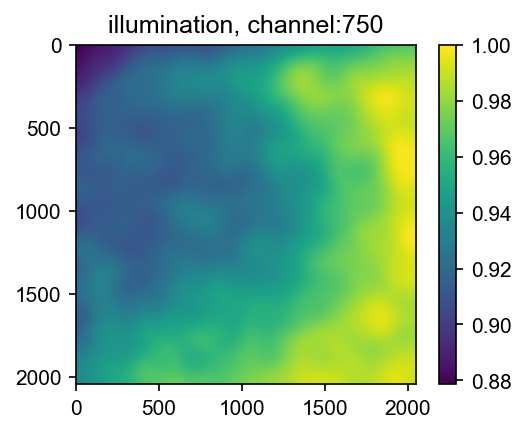

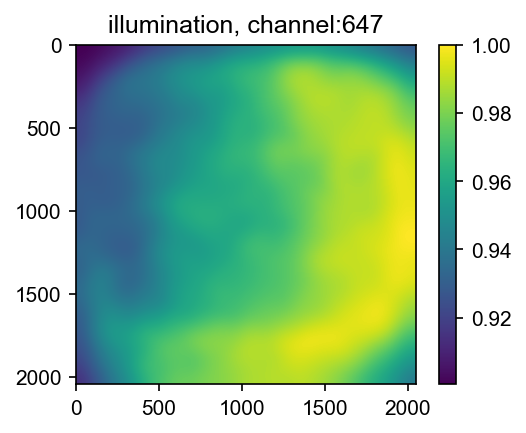

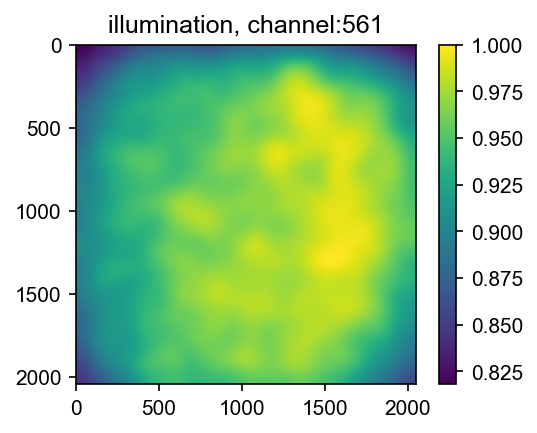

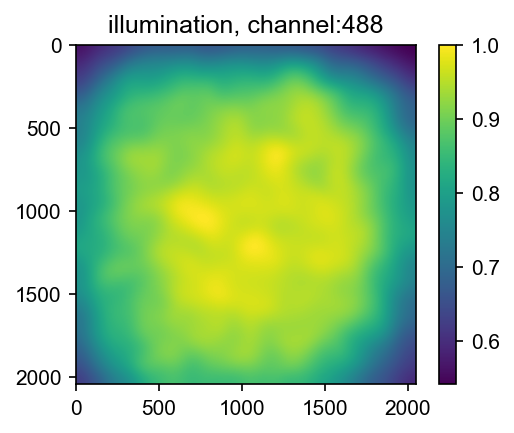

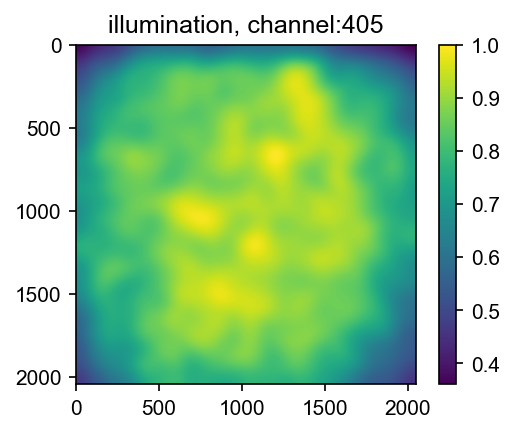

-- finish generating illumination profiles, time:2378.58s


In [14]:
%matplotlib inline
reload(ia.correction_tools.illumination)

dapi_folder = folders[0]
illumination_pfs = correction_tools.illumination.Generate_illumination_correction(
                        dapi_folder, 
                        all_colors,
                        all_channels=all_colors,
                        num_threads=num_threads,
                        num_images=num_images,
                        single_im_size=single_im_size,
                        correction_folder=correction_folder,
                        num_buffer_frames=num_buffer_frames,
                        gaussian_filter_size=40,
                        save=True, save_folder=correction_folder,
                        overwrite=False,
                        )

# Chromatic Abbrevation

## chromatic for 750

In [16]:
cc_folder = folders[0]
ref_folder = folders[1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0,
ref_folder:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 64 images in 16 threads in 30.333s.
++ fitting polynomial orders: [1 1 1]
-- constants: [-4.63869578e-01  1.17033215e-02  2.12136934e-04  2.73648134e-04] with rsquare=0.3120579448736661
-- constants: [-1.24114503e-02 -1.09278656e-03 -1.82097308e-03 -2.19223319e-05] with rsquare=0.8664990099564868
-- constants: [-1.42904139e-01  1.46541033e-03  2.11277426e-06 -1.82405117e-03] with rsquare=0.8625950906366107
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections


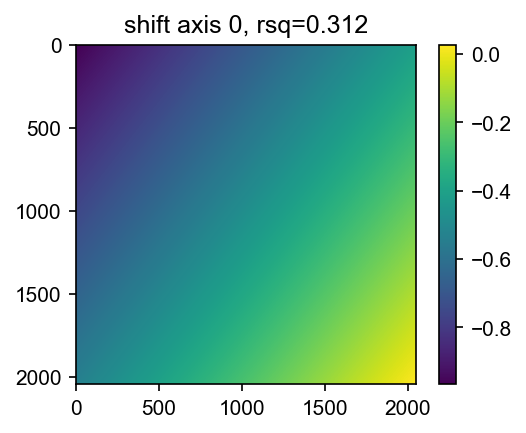

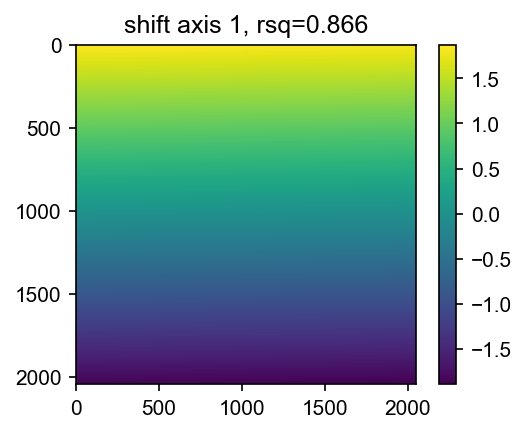

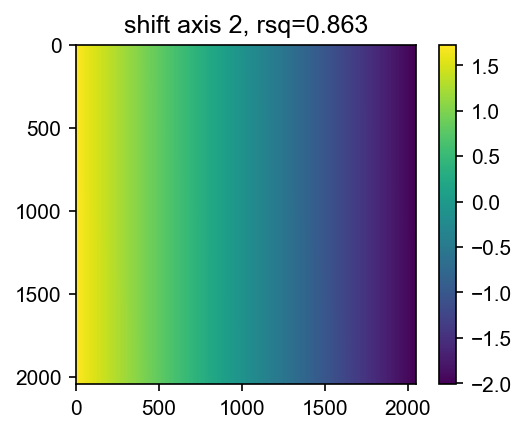

In [20]:
%matplotlib inline
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '750',
                                    num_images=num_images, 
                                    num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     'num_buffer_frames':0,
                                                     },
                                    save_folder=correction_folder,
                                    rsq_th=0.9,
                                    overwrite_temp=False,
                                    parallel=True,
                                    overwrite_profile=True)

### check chromatic abbrevation, 750-647

In [21]:
fov_id = 2
ref_filename = os.path.join(ref_folder, fovs[fov_id])
cc_filename = os.path.join(cc_folder, fovs[fov_id])

In [25]:
# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
                                            [647, 488], 
                                            single_im_size=single_im_size,
                                            num_buffer_frames=num_buffer_frames,
                                            all_channels=all_colors,
                                            calculate_drift=False,                                                    
                                            warp_image=True,
                                            illumination_corr=True,
                                            chromatic_corr=False,
                                            bleed_corr=False, 
                                            correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
                                                                [750, 488], 
                                                                calculate_drift=True,
                                                                ref_filename=ref_ims[-1],
                                                                single_im_size=single_im_size,
                                                                num_buffer_frames=num_buffer_frames,
                                                                all_channels=all_colors,
                                                                corr_channels=[750,647],
                                                                warp_image=False,
                                                                illumination_corr=True,
                                                                chromatic_corr=True,
                                                                bleed_corr=False, 
                                                                correction_folder=correction_folder,
                                                                return_drift=True)

# target image, warppring
warpped_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
                                                [750, 488], 
                                                calculate_drift=False,
                                                drift=drift,
                                                ref_filename=ref_ims[-1],
                                                single_im_size=single_im_size,
                                                num_buffer_frames=num_buffer_frames,
                                                all_channels=all_colors,
                                                  corr_channels=[750,647],
                                                warp_image=True,
                                                illumination_corr=True,
                                                chromatic_corr=True, 
                                                bleed_corr=False, 
                                                correction_folder=correction_folder,
                                                return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_02.dax  in 3.584s
-- removing hot pixels for channels:['647', '488'] in 32.130s
-- illumination correction for channels: 647, 488, in 6.155s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 43.333s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_60_2048_2048_const.pkl
	 

## visualize

<IPython.core.display.Javascript object>


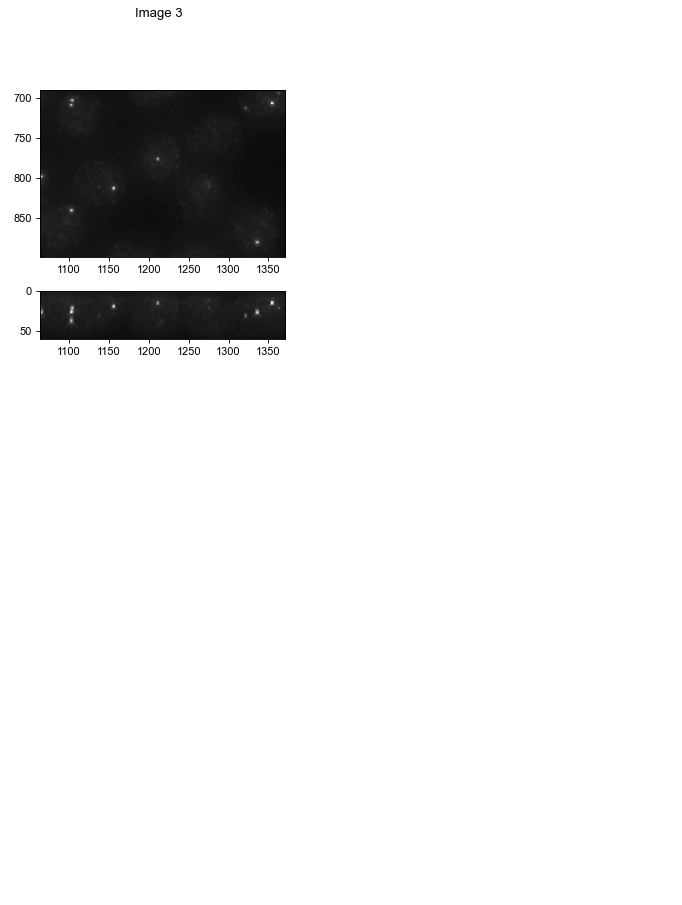

In [34]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], warpped_ims[0], ref_ims[0]])

In [27]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 300

warp_spots = fit_fov_image(warpped_ims[0], '750', th_seed=200, normalize_background=False)
raw_spots = fit_fov_image(raw_ims[0], '750', th_seed=200, normalize_background=False)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=300, normalize_background=False)

warp_spots = warp_spots[warp_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:750, 500 seeded, 500 fitted in 243.628s.
-- start fitting spots in channel:750, 500 seeded, 500 fitted in 249.003s.
-- start fitting spots in channel:647, 500 seeded, 

..\..\..\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


500 fitted in 250.012s.


In [66]:
raw_spots

(500, 11)

In [67]:

ch_info_list = pickle.load(open(r'\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\chromatic_Conv_zscan_00_channel_750_ref_647.pkl', 'rb'))

In [115]:
chromatic_infos = []
rsq_th = 0.9
ch_info_filenames = [os.path.join(folders[0], _fl) for _fl in os.listdir(folders[0]) if _fl.split(os.extsep)[-1]=='pkl' and 'chromatic' in _fl]
for _fl in ch_info_filenames:
    _loaded_infos = pickle.load(open(_fl, 'rb'))
    chromatic_infos.extend([_info for _info in _loaded_infos if _info['rsquare'] >= rsq_th])
    print(len(chromatic_infos))

151
263
388
521
613
690
770
851
918
1027
1151
1264
1415
1549
1700
1851
2003
2042
2097
2131
2236
2294
2334
2382
2449
2541
2611
2735
2835
2917
3053
3184
3306
3360
3391
3422
3457
3500
3540
3599
3657
3710
3779
3862
3926
3998
4115
4227
4338
4385
4413
4438
4460
4505
4541
4607
4684
4727
4776
4839
4889
4970
5080
5106


In [146]:
ref_coords = np.array([_info['ref_coord'] for _info in chromatic_infos])
ca_coords = np.array([_info['ca_coord'] + _info['drift'] for _info in chromatic_infos])
raw_ca_coords = np.array([_info['ca_coord'] for _info in chromatic_infos])

In [155]:
dz = ca_coords[:,0] - ref_coords[:,0] 

In [147]:
dx = ca_coords[:,1] - ref_coords[:,1] 

<IPython.core.display.Javascript object>


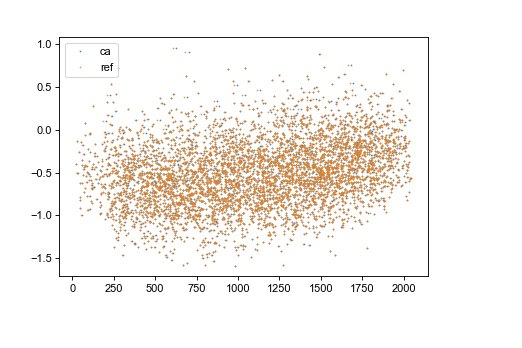

In [156]:
plt.figure()
plt.plot(raw_ca_coords[:,1],  dz, '.', markersize=1, label='ca')
plt.plot(ref_coords[:,1],  dz, '.', markersize=1, label='ref')
plt.legend()
plt.show()

In [177]:
len(chromatic_infos)

5106

In [196]:
from copy import copy
%matplotlib inline

In [205]:
del(model)

NameError: name 'model' is not defined

In [586]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import *#LinearRegression, Ridge, Lasso, ElasticNet,TheilSenRegressor,RANSACRegressor,HuberRegressor


def calculate_chromatic_abbrevation(tar_coords, ref_coords, model_type=LinearRegression, base='target'):
    
    _models = [model_type() for _i in np.arange(tar_coords.shape[1])]
    _yps = []
    for _iy, _y in enumerate(np.transpose(tar_coords - ref_coords)):
        print(_y.shape)
        if base == 'target':
            _X = tar_coords
        elif base == 'ref':
            _X = ref_coords
        elif base == 'middle':
            _X = (tar_coords + ref_coords) / 2
        else:
            raise ValueError(f"Wrong base, should be in ['target', 'ref', 'middle']")
        _model = _models[_iy]
        _model.fit(_X, _y)
        _yp = _model.predict(_X)
        _yps.append(_yp)
        # plot regression
        
        fig, axes = plt.subplots(1,3, figsize=(12,3),dpi=100)
        for _ix, (_ax, _x) in enumerate(zip(axes, np.transpose(_X))):
            _ax.plot(_x, _y, 'r.', markersize=1, label=f'data_axis{_iy}')
            _ax.plot(_x, _yp, 'b.', markersize=1, label=f'model_axis{_iy}')
            _ax.hlines(0, min(_x), max(_x), color='black', linestyle='-.')
            _ax.set_ylim([-2,2])
            _ax.legend(loc='upper right')
            _ax.set_xlabel(f"axis: {_ix}")
        plt.show()
        # plot residues
        
    return _models, np.transpose(np.array(_yps))

(5106,)


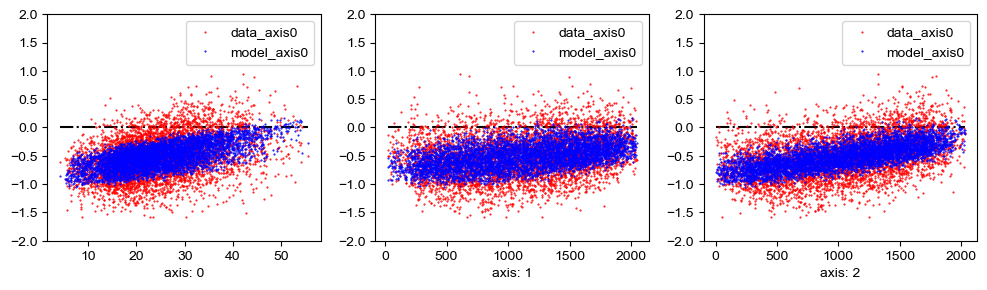

(5106,)


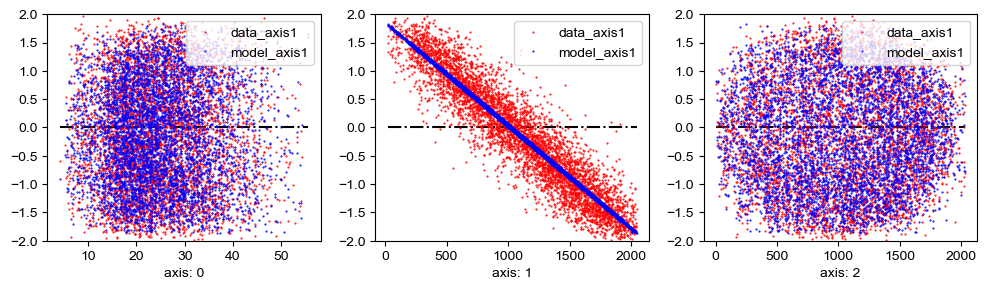

(5106,)


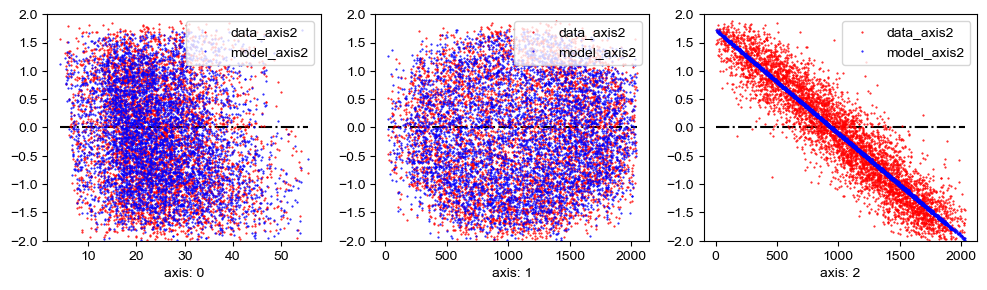

In [587]:
%matplotlib inline
models, yps = calculate_chromatic_abbrevation(ca_coords, ref_coords, model_type=LinearRegression, base='target')

61.026463
60.92747298230027


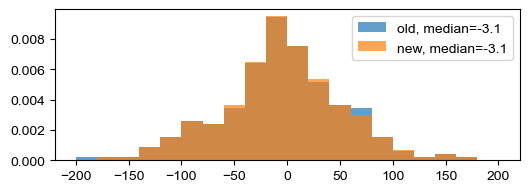

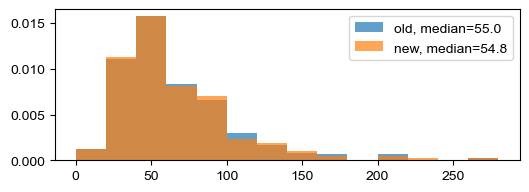

In [598]:
_dft, _ccoords, _rcoords = spot_tools.matching.find_paired_centers(corr_raw_spots[:,1:4], ref_spots[:,1:4])
_dft2, _raw_coords, _rcoords, _raw_inds, _rinds = spot_tools.matching.find_paired_centers(raw_spots[:,1:4]+drift, _rcoords, return_kept_inds=True)
_dft3, _ccoords, _rcoords = spot_tools.matching.find_paired_centers(corr_raw_spots[:,1:4], _rcoords)

_ncoords = _raw_coords - np.transpose([_model.predict(_raw_coords) for _model in models])


ax_id = 0

old_ax_err = (_ccoords-_rcoords)[:,ax_id]*ia._distance_zxy[ax_id]

new_ax_err = (_ncoords-_rcoords)[:,ax_id]*ia._distance_zxy[ax_id]

print(np.std(old_ax_err))
print(np.std(new_ax_err))

plt.figure(figsize=(6,2),dpi=100)
plt.hist(old_ax_err, alpha=0.7, density=True, bins=np.arange(-200,220,20), label=f'old, median={np.median(old_ax_err):.1f}')
plt.hist(new_ax_err, alpha=0.7, density=True, bins=np.arange(-200,220,20), label=f'new, median={np.median(new_ax_err):.1f}')
plt.legend()
plt.show()

old_err = np.linalg.norm((_rcoords-_ccoords)[:,:]*ia._distance_zxy[:], axis=1)

new_err = np.linalg.norm((_ncoords-_rcoords)[:,:]*ia._distance_zxy[:], axis=1)

plt.figure(figsize=(6,2),dpi=100)
plt.hist(old_err, alpha=0.7, density=True, bins=np.arange(0,300,20), label=f'old, median={np.median(old_err):.1f}')
plt.hist(new_err, alpha=0.7, density=True, bins=np.arange(0,300,20), label=f'new, median={np.median(new_err):.1f}')
plt.legend()
plt.show()

In [585]:
import statsmodels.api as sm
ys = ca_coords - ref_coords
_X = ca_coords

ax_id = 2
model = sm.OLS(ys[:,ax_id],sm.add_constant(_X))
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:34:15   Log-Likelihood:                -1898.7
No. Observations:                5106   AIC:                             3805.
Df Residuals:                    5102   BIC:                             3831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6853      0.020     85.134      0.0

In [566]:
ys[0]

(5106, 3)

In [589]:
models[0].intercept_, models[0].coef_

(-1.3169098044550271, array([0.01215139, 0.00021077, 0.00026969]))

In [582]:
from scipy import stats
ax_id = 1
MSE = (sum((ys-yps)[:,ax_id]**2))/(len(_X)-_X.shape[1])
print(MSE)
se = np.sqrt(MSE) / np.sqrt(np.sum((_X - np.mean(_X,axis=0))**2, axis=0))
t_stats = models[ax_id].coef_ / se

[1-stats.t.cdf(_ts, (len(_X)-_X.shape[1])) for _ts in t_stats]

0.12444354891935043


[0.978414089159235, 1.0, 0.9823002657542234]

In [591]:
rss = np.sum((ys - yps)**2, axis=0)
rse = np.sqrt(rss / (len(_X)-_X.shape[1]))
tss = np.sum((ys - np.mean(ys,axis=0))**2, axis=0)
rsqs = 1 - rss/tss
print(rsqs)

[0.31852614 0.86632431 0.86227216]


61.026463
60.92747298230027


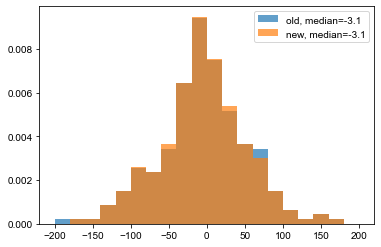

In [482]:
ax_id = 0
old_z_err = (_ccoords-_rcoords)[:,ax_id]*ia._distance_zxy[ax_id]

new_z_err = (_ncoords-_rcoords)[:,ax_id]*ia._distance_zxy[ax_id]

print(np.std(old_z_err))
print(np.std(new_z_err))

plt.figure()
plt.hist(old_z_err, alpha=0.7, density=True, bins=np.arange(-200,220,20), label=f'old, median={np.median(old_z_err):.1f}')
plt.hist(new_z_err, alpha=0.7, density=True, bins=np.arange(-200,220,20), label=f'new, median={np.median(new_z_err):.1f}')
plt.legend()
plt.show()

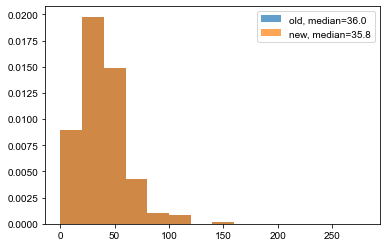

In [483]:
old_err = np.linalg.norm((_rcoords-_ccoords)[:,1:]*ia._distance_zxy[1:], axis=1)

new_err = np.linalg.norm((_ncoords-_rcoords)[:,1:]*ia._distance_zxy[1:], axis=1)

plt.figure()
plt.hist(old_err, alpha=0.7, density=True, bins=np.arange(0,300,20), label=f'old, median={np.median(old_err):.1f}')
plt.hist(new_err, alpha=0.7, density=True, bins=np.arange(0,300,20), label=f'new, median={np.median(new_err):.1f}')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


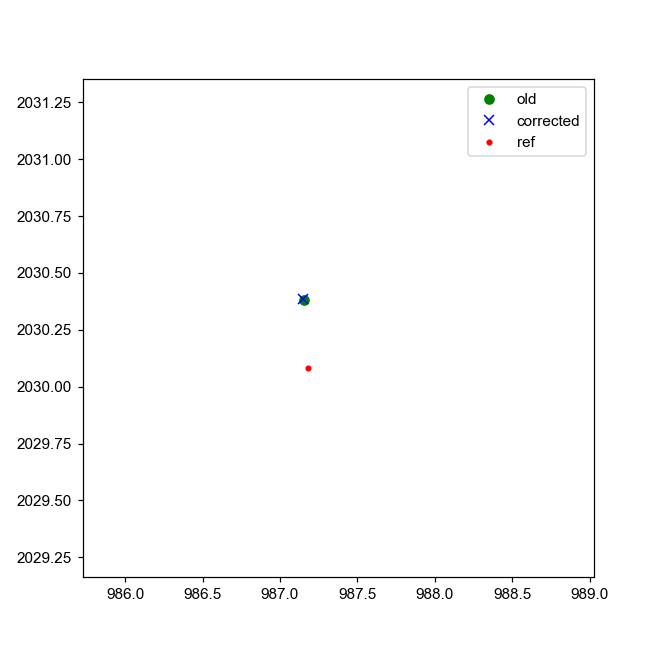

In [601]:
%matplotlib notebook

ax_pair = [1,2]

plt.figure(figsize=(6,6),dpi=100)
plt.plot(_ccoords[:,ax_pair[0]], _ccoords[:,ax_pair[1]], 'go', label='old')
plt.plot(_ncoords[:,ax_pair[0]], _ncoords[:,ax_pair[1]], 'bx', label='corrected')
plt.plot(_rcoords[:,ax_pair[0]], _rcoords[:,ax_pair[1]], 'r.', label='ref')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


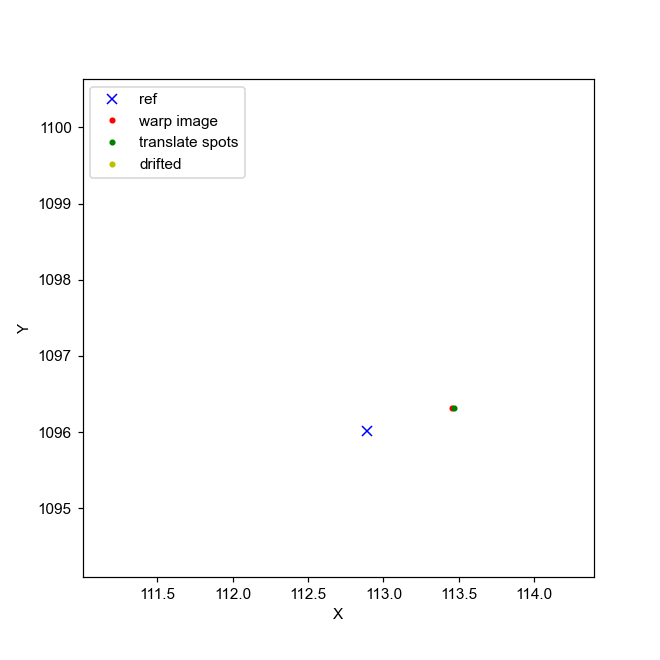

In [62]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(ref_spots[:,2], ref_spots[:,3], 'bx', label='ref')
plt.plot(warp_spots[:,2], warp_spots[:,3], 'r.', label='warp image')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='translate spots')
plt.plot(raw_spots[:,2]+drift[1], raw_spots[:,3]+drift[2], 'y.', label='drifted')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## chromatic for 561

In [602]:
cc_folder = folders[2]
ref_folder = folders[1]
print(f"chromatic_corr_folder: {cc_folder},\nref_folder:{ref_folder}")

chromatic_corr_folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H2R2,
ref_folder:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1


-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
++ generating chromatic info for 64 images in 16 threads in 5812.885s.
++ fitting polynomial orders: [1 1 1]
-- constants: [ 5.99287923e-01 -1.36139899e-02  2.06396933e-04  1.04339725e-04] with rsquare=0.34574052693697543
-- constants: [ 2.08541395e-02  1.27297143e-03  1.72546880e-03 -5.51749610e-06] with rsquare=0.9671009976485598
-- constants: [ 2.87892122e-01 -6.20604364e-04 -9.75109008e-07  1.73943139e-03] with rsquare=0.9672904270073747
++ saving new profiles into folder: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections


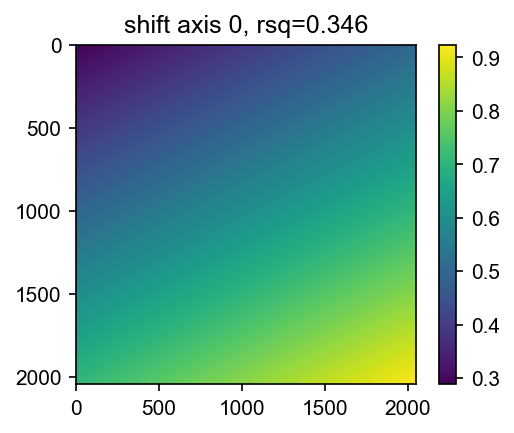

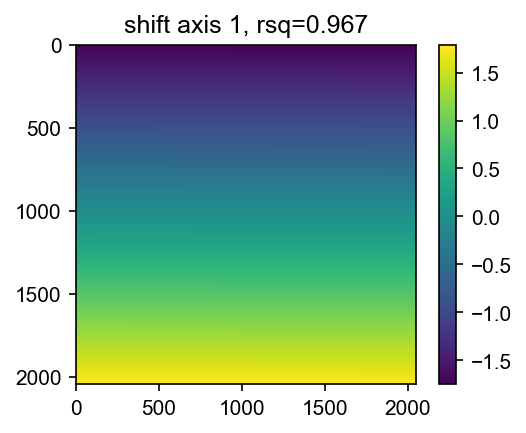

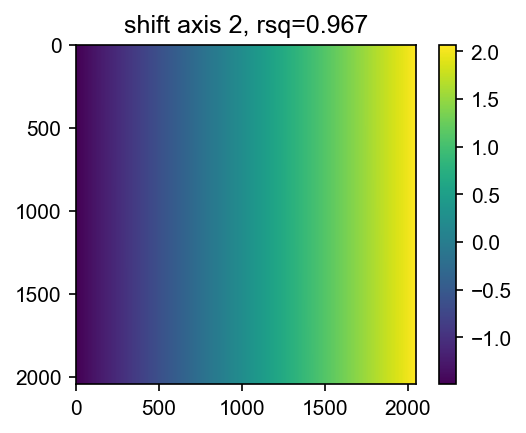

In [603]:
%matplotlib inline
reload(correction_tools.chromatic)
chromatic_pfs, chromatic_consts = correction_tools.chromatic.Generate_chromatic_abbrevation(
                                    cc_folder, ref_folder, '561',
                                    num_images=num_images, 
                                    num_threads=num_threads, 
                                    fitting_orders=[1,1,1],
                                    correction_args={'correction_folder':correction_folder,
                                                     'single_im_size': single_im_size,
                                                     'all_channels': all_colors,
                                                     'corr_channels': ['750', '647', '561'],
                                                     'num_buffer_frames':0,
                                                     },
                                    save_folder=correction_folder,
                                    rsq_th=0.9,
                                    overwrite_temp=False,
                                    parallel=True,
                                    overwrite_profile=True)

### check chromatic abbrevation, 750-647

In [604]:
fov_id = 2
ref_filename = os.path.join(ref_folder, fovs[fov_id])
cc_filename = os.path.join(cc_folder, fovs[fov_id])

In [605]:
# reference image
ref_ims, = ia.io_tools.load.correct_fov_image(ref_filename, 
                                            [647, 488], 
                                            single_im_size=single_im_size,
                                            num_buffer_frames=num_buffer_frames,
                                            all_channels=all_colors,
                                            calculate_drift=False,                                                    
                                            warp_image=True,
                                            illumination_corr=True,
                                            chromatic_corr=False,
                                            bleed_corr=False, 
                                            correction_folder=correction_folder)

# target image, not warpping
raw_ims, corr_funcs, drift = ia.io_tools.load.correct_fov_image(cc_filename, 
                                                                [561, 488], 
                                                                calculate_drift=True,
                                                                ref_filename=ref_ims[-1],
                                                                single_im_size=single_im_size,
                                                                num_buffer_frames=num_buffer_frames,
                                                                all_channels=all_colors,
                                                                corr_channels=[561,647],
                                                                warp_image=False,
                                                                illumination_corr=True,
                                                                chromatic_corr=True,
                                                                bleed_corr=False, 
                                                                correction_folder=correction_folder,
                                                                return_drift=True)

# target image, warppring
warpped_ims, = ia.io_tools.load.correct_fov_image(cc_filename, 
                                                [561, 488], 
                                                calculate_drift=False,
                                                drift=drift,
                                                ref_filename=ref_ims[-1],
                                                single_im_size=single_im_size,
                                                num_buffer_frames=num_buffer_frames,
                                                all_channels=all_colors,
                                                  corr_channels=[561,647],
                                                warp_image=True,
                                                illumination_corr=True,
                                                chromatic_corr=True, 
                                                bleed_corr=False, 
                                                correction_folder=correction_folder,
                                                return_drift=False)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_02.dax  in 8.096s
-- removing hot pixels for channels:['647', '488'] in 31.883s
-- illumination correction for channels: 647, 488, in 6.206s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 47.866s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H2R2\Conv_zscan_02.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading chromatic_constants correction profile from file:
	 647 None
	 561 chromatic_correction_561_647_60_2048_2048_c

### visualize

<IPython.core.display.Javascript object>


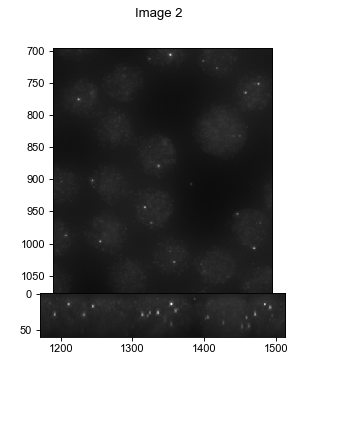

In [606]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([raw_ims[0], warpped_ims[0], ref_ims[0]])

### check fitted spots

In [607]:
reload(ia.io_tools.load)
reload(ia.correction_tools.chromatic)
from ImageAnalysis3.spot_tools.fitting import fit_fov_image
# fitting
int_th = 300

warp_spots = fit_fov_image(warpped_ims[0], '561', th_seed=200, normalize_background=False)
raw_spots = fit_fov_image(raw_ims[0], '561', th_seed=200, normalize_background=False)
ref_spots = fit_fov_image(ref_ims[0], '647', th_seed=300, normalize_background=False)

warp_spots = warp_spots[warp_spots[:,0] >= int_th]
raw_spots = raw_spots[raw_spots[:,0] >= int_th]
corr_raw_spots = corr_funcs[0](raw_spots)
ref_spots = ref_spots[ref_spots[:,0] >= int_th]

-- start fitting spots in channel:561, 500 seeded, 500 fitted in 287.161s.
-- start fitting spots in channel:561, 500 seeded, 500 fitted in 290.342s.
-- start fitting spots in channel:647, 500 seeded, 

..\..\..\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


500 fitted in 270.075s.


<IPython.core.display.Javascript object>


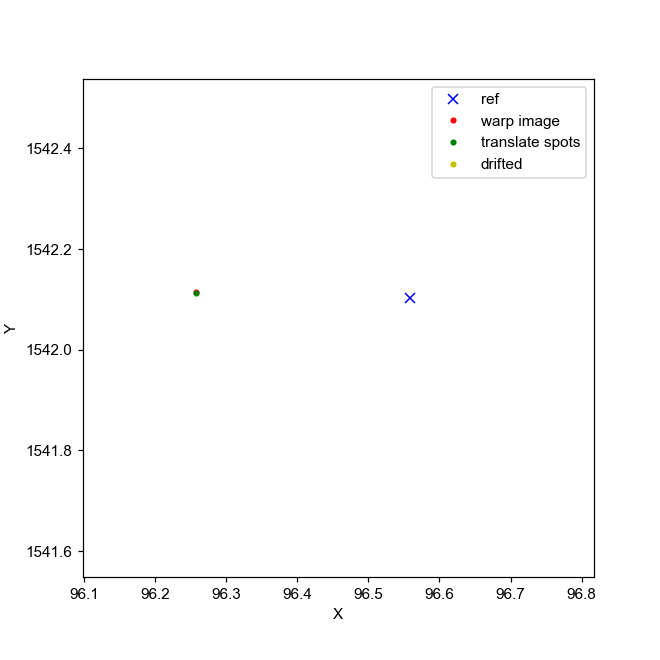

In [608]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(ref_spots[:,2], ref_spots[:,3], 'bx', label='ref')
plt.plot(warp_spots[:,2], warp_spots[:,3], 'r.', label='warp image')
plt.plot(corr_raw_spots[:,2], corr_raw_spots[:,3], 'g.', label='translate spots')
plt.plot(raw_spots[:,2]+drift[1], raw_spots[:,3]+drift[2], 'y.', label='drifted')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

16.22738


<IPython.core.display.Javascript object>


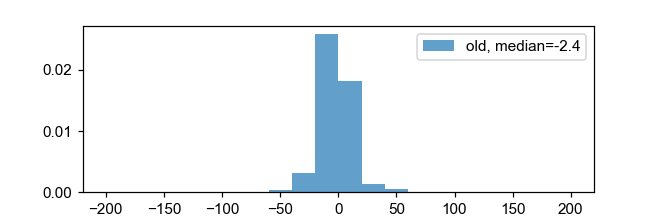

In [611]:
_dft, _ccoords, _rcoords = spot_tools.matching.find_paired_centers(corr_raw_spots[:,1:4], ref_spots[:,1:4])
_dft2, _raw_coords, _rcoords, _raw_inds, _rinds = spot_tools.matching.find_paired_centers(raw_spots[:,1:4]+drift, _rcoords, return_kept_inds=True)
_dft3, _ccoords, _rcoords = spot_tools.matching.find_paired_centers(corr_raw_spots[:,1:4], _rcoords)



ax_id = 2

old_ax_err = (_ccoords-_rcoords)[:,ax_id]*ia._distance_zxy[ax_id]


print(np.std(old_ax_err))

plt.figure(figsize=(6,2),dpi=100)
plt.hist(old_ax_err, alpha=0.7, density=True, bins=np.arange(-200,220,20), label=f'old, median={np.median(old_ax_err):.1f}')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


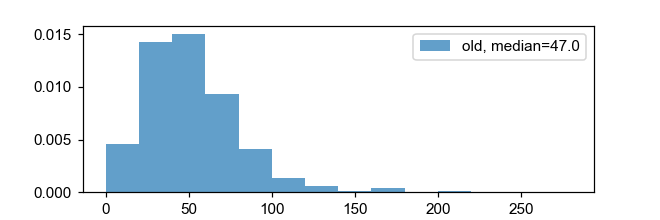

In [612]:
old_err = np.linalg.norm((_rcoords-_ccoords)[:,:]*ia._distance_zxy[:], axis=1)

plt.figure(figsize=(6,2),dpi=100)
plt.hist(old_err, alpha=0.7, density=True, bins=np.arange(0,300,20), label=f'old, median={np.median(old_err):.1f}')
plt.legend()
plt.show()

# bleedthrough correction

In [40]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647', '561']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750','647','561'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
    'num_buffer_frames':num_buffer_frames,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from '..\\..\\..\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 63 images with 16 threads in 17.417s.
- check 135 bleedthrough pairs.
- start iteration with outlier_sigma=3.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.978, total: 0.978 in 0.312s
- 132 pairs passed.
-- 132 spots are used to generate profiles from 750 to 647
[0.13437333] 2.220446049250313e-16
[5759.64170493] -2.220446049250313e-16
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


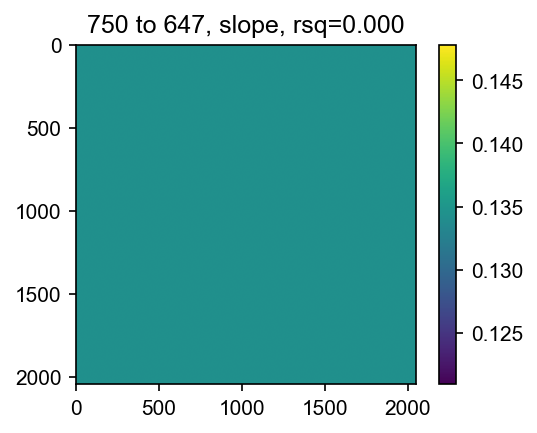

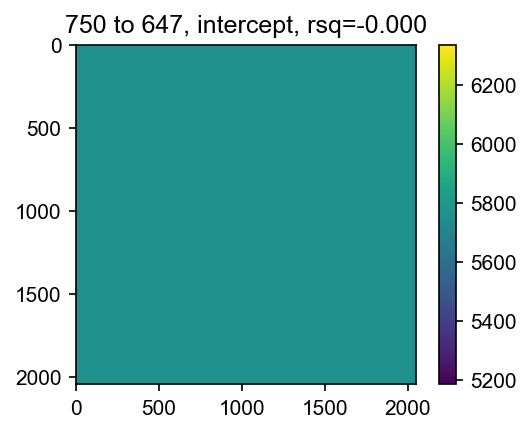

-- not enough spots (0) from 750 to 561
-- not enough spots (0) from 647 to 750
- check 171 bleedthrough pairs.
- start iteration with outlier_sigma=3.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.959, total: 0.959 in 0.497s
- 164 pairs passed.
-- 164 spots are used to generate profiles from 647 to 561
[0.10651001] 0.0
[3616.08963742] 0.0
-- saving bleedthrough temp profile from channel: 647 to channel: 561.


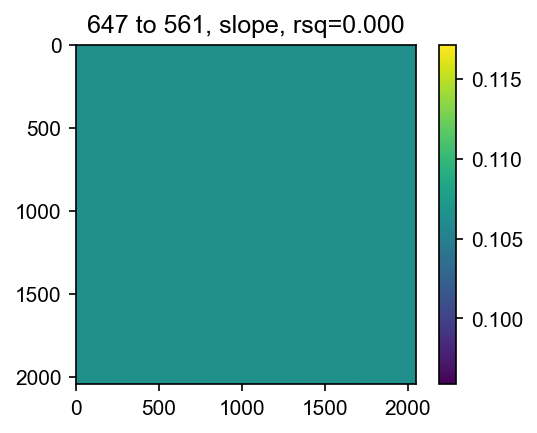

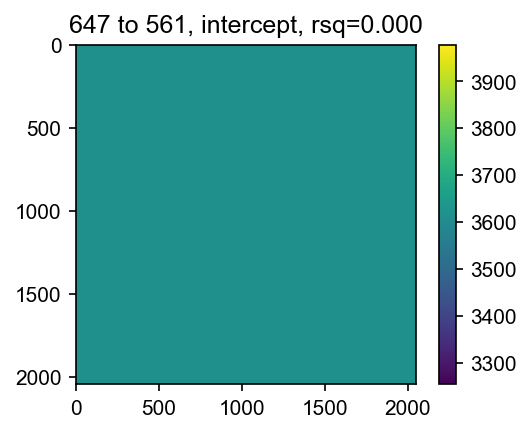

-- not enough spots (1) from 561 to 750
-- not enough spots (12) from 561 to 647
-- generating inverse matrix.
-- saving to file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\bleedthrough_correction_750_647_561_2048_2048.npy


In [57]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[:3],
            rsq_th=0.9,
            intensity_th=300,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_order=0,
            fitting_args=bleedthrough_fitting_args,
            interpolate_args={'check_params':{'outlier_sigma':3.}, 'min_num_spots':100, 'max_num_spots':2000},
            num_images=num_images, 
            num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            parallel=True,
            )

### Check bleedthorugh for cy7

In [44]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [43]:
cy7_filename = os.path.join(folders[0], fovs[3])


\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax


In [52]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[0], fovs[3])
print(cy7_filename)

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  hot_pixel_corr=False, z_shift_corr=True,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  num_buffer_frames=num_buffer_frames,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False,
                                                   hot_pixel_corr=False, z_shift_corr=True,
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   num_buffer_frames=num_buffer_frames,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax  in 4.929s
-- illumination correction for channels: 750, 647, 561, in 8.981s
-- warp image with drift:[0. 0. 0.] in 0.001s
-- finish correction in 16.045s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2

<IPython.core.display.Javascript object>


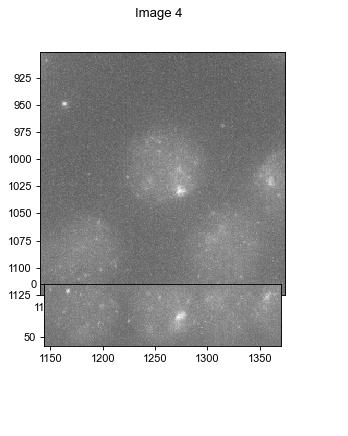

In [599]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

### Check bleedthrough for cy5

In [58]:
reload(ia.io_tools.load)
cy5_filename = os.path.join(folders[1], fovs[3])

cy5_raw_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  hot_pixel_corr=False, z_shift_corr=True,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  num_buffer_frames=num_buffer_frames,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy5_corr_ims, = ia.io_tools.load.correct_fov_image(cy5_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   hot_pixel_corr=False, z_shift_corr=True,
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   num_buffer_frames=num_buffer_frames,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_03.dax  in 4.091s
-- correct Z-shifts for channels:['750', '647', '561'] in 34.107s
-- illumination correction for channels: 750, 647, 561, in 8.965s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 49.290s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleed

<IPython.core.display.Javascript object>


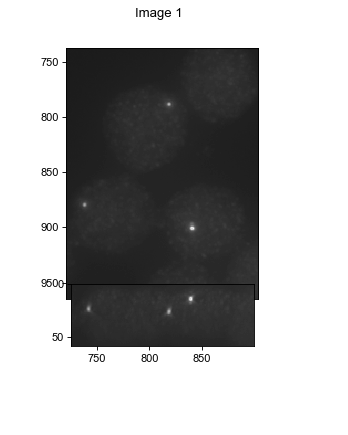

In [59]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy5_raw_ims[1], cy5_corr_ims[1], cy5_raw_ims[2], cy5_corr_ims[2]])

### Check bleedthrough for cy3

In [60]:
reload(ia.io_tools.load)
cy3_filename = os.path.join(folders[2], fovs[3])

cy3_raw_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  hot_pixel_corr=False, z_shift_corr=True,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  num_buffer_frames=num_buffer_frames,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy3_corr_ims, = ia.io_tools.load.correct_fov_image(cy3_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False, 
                                                   hot_pixel_corr=False, z_shift_corr=True,
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   num_buffer_frames=num_buffer_frames,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H2R2\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H2R2\Conv_zscan_03.dax  in 7.210s
-- correct Z-shifts for channels:['750', '647', '561'] in 35.163s
-- illumination correction for channels: 750, 647, 561, in 8.945s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 53.448s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H2R2\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleed

<IPython.core.display.Javascript object>


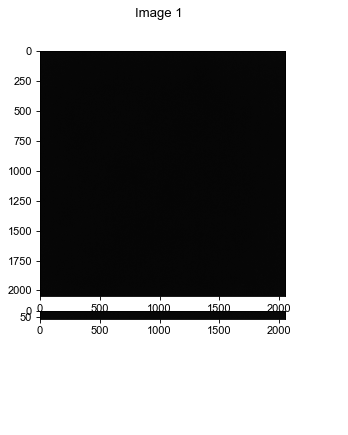

In [61]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy3_raw_ims[0], cy3_corr_ims[0], cy3_raw_ims[1], cy3_corr_ims[1], cy3_raw_ims[2], cy3_corr_ims[2]])

## 2-color bleedthrough profiles

In [613]:
all_colors

['750', '647', '561', '488', '405']

In [614]:
from ImageAnalysis3 import _image_size, _correction_folder, _allowed_colors
reload(correction_tools.bleedthrough)
from ImageAnalysis3.correction_tools.bleedthrough import find_bleedthrough_pairs, interploate_bleedthrough_correction_from_channel
import multiprocessing as mp
from ImageAnalysis3.correction_tools.chromatic import generate_polynomial_data


bleedthrough_channels=['750', '647']

bleedthrough_correction_args = {
    'correction_folder': _correction_folder,
    'single_im_size':single_im_size,
    'all_channels':all_colors,
    'corr_channels':['750','647'],
    'bleed_corr':False,
    'illumination_corr':False,
    'chromatic_corr':False,
    'num_buffer_frames':num_buffer_frames,
}

bleedthrough_fitting_args = {'max_num_seeds':1000,
    'th_seed': 500,
    'use_dynamic_th':True,
}
reload(correction_tools.bleedthrough)

<module 'ImageAnalysis3.correction_tools.bleedthrough' from '..\\..\\..\\Documents\\ImageAnalysis3\\correction_tools\\bleedthrough.py'>

+ generating bleedthrough profiles.
++ generating bleedthrough info for 63 images with 16 threads in 14.293s.
- check 135 bleedthrough pairs.
- start iteration with outlier_sigma=3.00, keep_percentage=0.95
-- iter: 1, kept in this round: 0.978, total: 0.978 in 0.314s
- 132 pairs passed.
-- 132 spots are used to generate profiles from 750 to 647
[0.13437333] 2.220446049250313e-16
[5759.64170493] -2.220446049250313e-16
-- saving bleedthrough temp profile from channel: 750 to channel: 647.


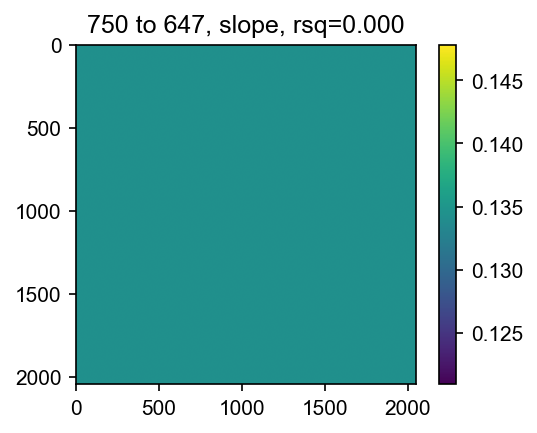

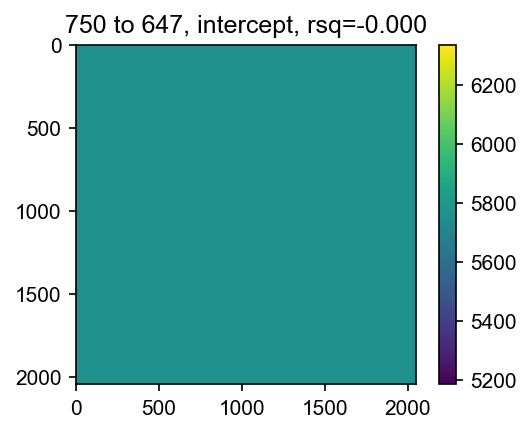

-- not enough spots (0) from 647 to 750
-- generating inverse matrix.
-- saving to file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\Corrections\bleedthrough_correction_750_647_2048_2048.npy


In [615]:
%matplotlib inline
reload(correction_tools.bleedthrough)
bleed_pf = correction_tools.bleedthrough.Generate_bleedthrough_correction(
            folders[:2],
            rsq_th=0.9,
            intensity_th=300,
            corr_channels=bleedthrough_channels,
            correction_args=bleedthrough_correction_args,
            fitting_order=0,
            fitting_args=bleedthrough_fitting_args,
            interpolate_args={'check_params':{'outlier_sigma':3.}, 'min_num_spots':100, 'max_num_spots':2000},
            num_images=num_images, 
            num_threads=num_threads,
            save_folder=correction_folder,
            overwrite_profile=True,
            overwrite_temp=False,
            parallel=True,
            )

### Check bleedthorugh for cy7

In [616]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [617]:
cy7_filename = os.path.join(folders[0], fovs[3])


In [618]:
reload(ia.io_tools.load)
cy7_filename = os.path.join(folders[0], fovs[3])
print(cy7_filename)

cy7_raw_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                  bleedthrough_channels, 
                                                  bleed_corr=False, chromatic_corr=False,
                                                  hot_pixel_corr=False, z_shift_corr=True,
                                                  corr_channels=bleedthrough_channels,
                                                  single_im_size=single_im_size,
                                                  num_buffer_frames=num_buffer_frames,
                                                  all_channels=all_colors,
                                                  illumination_corr=True,
                                                  correction_folder=correction_folder)
cy7_corr_ims, = ia.io_tools.load.correct_fov_image(cy7_filename, 
                                                   bleedthrough_channels, 
                                                   bleed_corr=True, chromatic_corr=False,
                                                   hot_pixel_corr=False, z_shift_corr=True,
                                                   corr_channels=bleedthrough_channels,
                                                   single_im_size=single_im_size,
                                                   num_buffer_frames=num_buffer_frames,
                                                   all_channels=all_colors,
                                                   illumination_corr=True,
                                                   correction_folder=correction_folder)

\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax  in 8.050s
-- correct Z-shifts for channels:['750', '647'] in 27.342s
-- illumination correction for channels: 750, 647, in 6.960s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 44.142s
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210621-proB_Dox_CTP-08_colorswap\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
-- loading bleedthrough correction

<IPython.core.display.Javascript object>


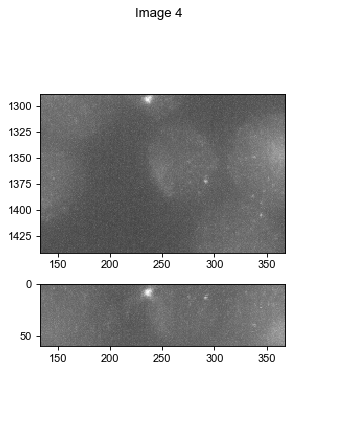

In [619]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([cy7_raw_ims[0], cy7_corr_ims[0], cy7_raw_ims[1], cy7_corr_ims[1]])

In [620]:
os.listdir(correction_folder)

['bleedthrough_correction_750_647_2048_2048.npy',
 'bleedthrough_correction_750_647_561_2048_2048.npy',
 'bleedthrough_profile_561_to_647_intercept.png',
 'bleedthrough_profile_561_to_647_slope.png',
 'bleedthrough_profile_647_to_561_intercept.png',
 'bleedthrough_profile_647_to_561_slope.png',
 'bleedthrough_profile_750_to_647_intercept.png',
 'bleedthrough_profile_750_to_647_slope.png',
 'chromatic_correction_561_647_60_2048_2048.npy',
 'chromatic_correction_561_647_60_2048_2048_0.png',
 'chromatic_correction_561_647_60_2048_2048_1.png',
 'chromatic_correction_561_647_60_2048_2048_2.png',
 'chromatic_correction_561_647_60_2048_2048_const.pkl',
 'chromatic_correction_750_647_60_2048_2048.npy',
 'chromatic_correction_750_647_60_2048_2048_0.png',
 'chromatic_correction_750_647_60_2048_2048_1.png',
 'chromatic_correction_750_647_60_2048_2048_2.png',
 'chromatic_correction_750_647_60_2048_2048_const.pkl',
 'illumination_correction_405_2048x2048.npy',
 'illumination_correction_405_2048x204